In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
one_three = ["a=0.1593","a=0.1615", "a=0.1590", "a=0.1588"]
three_five = ["a=0.1540", "a=0.1566", "a=0.1539", "a=0.1559", "a=0.1569", "a=0.1544", "a=0.1552", "a=0.1570"]
five_seven = ["a=0.1499", "a=0.1515", "a=0.1500", "a=0.1519", "a=0.1493", "a=0.1518"] 
seven_nine = ["a=0.1452", "a=0.1476", "a=0.1453", "a=0.1472", "a=0.1452", "a=0.1476"]
nine_one = ["a=0.1430", "a=0.1409", "a=0.1435", "a=0.1429"]

In [3]:
def cdf_tau_quantile(directory, res_files, target_files, valid_start_chars, los, combined_annotation, xy_position, num_samples=1000):
    """
    Plots the cdf vs. tau value for a specific redshift range
    
    Parameters:
    directory (string): the source code for where the data files are stored on your computer
    res_files (list): list of strings of the res_file found in the data files labeled by cosmic parameters
    target_files (list): list of strings detailing the cosmic parameters that are to be plotted
    valid_start_chars (list): list of strings of the box sizes that are to be plotted
    los (int): the number of line of sight samples to take
    combined_annotation (string): a description of the redshift values being plotted, or any other information
    xy_position (tuple): the position of the annotation box on the graph
    num_samples (int): the number of random samples to take for computing percentiles
    """

    all_data = []
    for subdir in os.listdir(directory):
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files:
                    for res_file in res_files:
                        file_path = os.path.join(subdir_path, file_name, res_file)
                        if os.path.isfile(file_path):
                            print(f"File exists: {file_path}")
                            df = pd.read_csv(file_path, delimiter=' ')
                            all_data.append(df)
    
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)

    all_tau_values = -np.log(combined_df.values.flatten())
    #one = np.linspace(0, 1, los+1)
    #one = np.arange(los)/(los-1)
    one = np.linspace(0,1,los)
    q25_arr, q75_arr, q50_arr, q5_arr, q95_arr = [],[],[],[],[]
    
    tau_samples = []
    for _ in range(num_samples):
        sample = np.random.choice(all_tau_values, los, replace=False)
        sample.sort()
        tau_samples.append(sample)
    for i in range(los):
        tau_1 = [sample[i] for sample in tau_samples]
        tau_1 = np.array(tau_1)
        q25 = np.quantile(tau_1, .25)
        q75 = np.quantile(tau_1, .75)
        q50 = np.quantile(tau_1, .5)
        q5 = np.quantile(tau_1, .05)
        q95 = np.quantile(tau_1, .95)
        q50_arr.append(q50)
        q25_arr.append(q25)
        q75_arr.append(q75)
        q5_arr.append(q5)
        q95_arr.append(q95)
    
    plt.plot(q50_arr, one, label='Median, ' + str(los) + ' samples', color='black')
    plt.fill_betweenx(one, q25_arr, q75_arr, color='gray', alpha=0.5, label='25% to 75%')
    plt.fill_betweenx(one, q5_arr, q95_arr, color='gray', alpha=0.2, label='5% to 95%')
    plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
    plt.xlim([0,8])
    plt.ylabel(r'P(> $\langle \tau_{\mathrm{GP}} \rangle_{50}$)', fontsize=20)
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    plt.annotate(combined_annotation, xy=xy_position, bbox=bbox_props, ha='center', va='center',fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15) 
    plt.legend(loc='upper left',fontsize=14)

File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1430\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1409\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1435\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1429\avgflux.x50.res


C:\Users\eawer\AppData\Local\Temp\ipykernel_14672\3347265040.py:33: RuntimeWarning: divide by zero encountered in log
  all_tau_values = -np.log(combined_df.values.flatten())


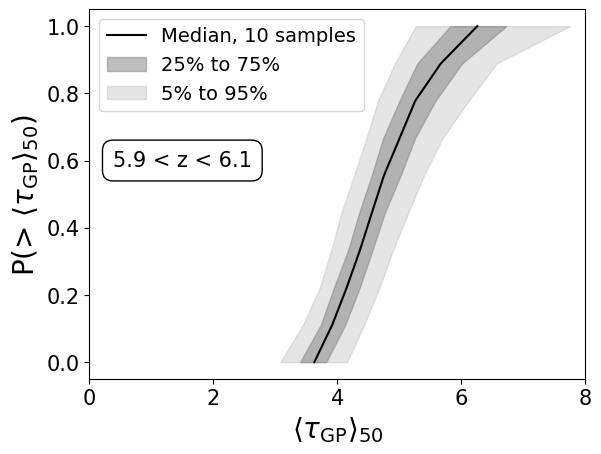

In [4]:
cdf_tau_quantile(r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40',["avgflux.x50.res"],nine_one,['A','C','F'],10,'5.9 < z < 6.1',(1.5, .6))

In [5]:
def histogram(directory, res_files, target_files,valid_start_chars,los,cdf,combined_annotation,xy_position,bin_size,scale):
    """"
    Plots a histogram of optical depth data at a specific redshift range and CDF value
    
    Parameters:
    directory (string): the source code for where the data files are stored on your computer
    res_files (list): list of strings of the res_file found in the data files labeled by cosmic parameters
    target_files (list): list of strings detailing the cosmic parameters that are to be plotted
    valid_start_chars (list): list of strings of the box sizes that are to be plotted
    los (float): the value of line of sight sampling that the data will be split into
    cdf (float): the value of cdf that the optical depth will be plotted against
    combined_annotation (string): a description of the redshift values being plotted, or any other information
    xy_position (floats): the position of the annotation box on the graph
    bin_size (int): size of bins for the histogram
    scale (string): decides if the y-axis is scaled linearly or log
    """
    all_dataframes = [] 
    for subdir in os.listdir(directory): #loads in chosen directory
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files: #cycles through a list of box sizes
                    for res_file in res_files: #cycles through a list of res_files
                        file_path = os.path.join(subdir_path, file_name, res_file)
                        if os.path.isfile(file_path):
                            print(f"File exists: {file_path}")
                            df = pd.read_csv(file_path, delimiter=' ')
                            all_dataframes.append(df) #appends all the selected resfiles to the same list
                        #else:
                            #print(f"File does not exist: {file_path}")
                            
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    z = combined_df.transpose()
    df= [z.iloc[:, i:i+los] for i in range(0, z.shape[1], los)] #splits the data into los sample sizes
    tau_1 = [] 
    one = np.linspace(0,1,los) #initalizes the cumulative distribution function
    for i in df:
        first_row = i.iloc[0] #extracts the first row of 'df'
        tau = -np.log(np.array(first_row)) #calculates 'flux' to 'tau' from the original data
        tau_sort = np.sort(tau)
        index_1 = np.abs(np.array(one) - cdf).argmin() #calculates the difference between 'one' and the chosen cdf value for plotting
        tau_1_value = tau_sort[index_1]
        tau_1.append(tau_1_value)
    tau_1 = np.array(tau_1)
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='large')
    plt.rc('ytick', labelsize='large')
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    plt.annotate(combined_annotation, xy=xy_position, 
             bbox=bbox_props, ha='center', va='center',fontsize=16)
    plt.hist(tau_1, bins=bin_size, density = 'True', color='blue', alpha=0.5, edgecolor='black',linewidth=1.5)
    plt.xlabel(r'$\langle \tau_{\mathrm{GP}} \rangle_{50}$', fontsize=20)
    plt.ylabel(r'$\frac{dP(\tau)}{d\tau}$', fontsize=20)
    plt.yscale(scale)
    plt.show()

File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1499\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\A\a=0.1515\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1500\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\C\a=0.1519\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\F\a=0.1493\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40\F\a=0.1518\avgflux.x50.res


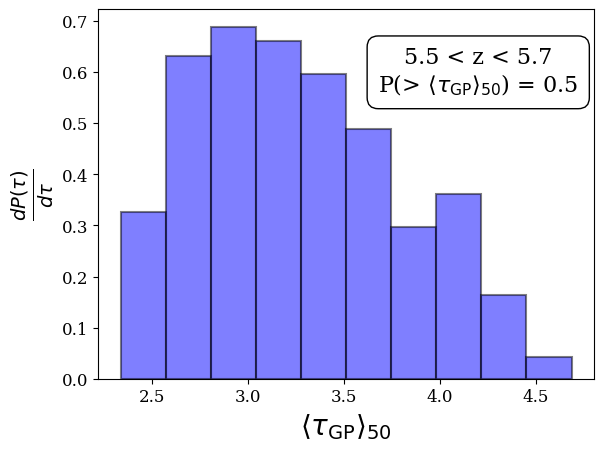

In [6]:
histogram(r'C:\Users\eawer\Downloads\C40-20240503T164200Z-001\C40',["avgflux.x50.res"],five_seven,['A','C','F'],10,.5,'5.5 < z < 5.7\nP(> $\\langle \\tau_{\\mathrm{GP}} \\rangle_{50}$) = 0.5'
,(4.2,.6),10,'linear')

In [7]:
def width_los(directory, res_files, target_files, valid_start_chars, los_values, cdf_value, combined_annotation, xy_position, num_samples=1000):
    """"
    Plots values of LOS versus optical depth quantiles/
    
    Parameters:
    directory (string): the source code for where the data files are stored on your computer
    res_files (list): list of strings of the res_file found in the data files labeled by cosmic parameters
    target_files (list): list of strings detailing the cosmic parameters that are to be plotted
    valid_start_chars (list): list of strings of the box sizes that are to be plotted
    los_values (float): the value of line of sight sampling that the data will be split into
    cdf_value (float): the value of cdf that the optical depth will be plotted against
    combined_annotation (string): a description of the redshift values being plotted, or any other information
    xy_position (floats): the position of the annotation box on the graph
    """
    all_data = []
    for subdir in os.listdir(directory):
        if subdir[0] in valid_start_chars:
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                for file_name in target_files:
                    for res_file in res_files:
                        file_path = os.path.join(subdir_path, file_name, res_file)
                        if os.path.isfile(file_path):
                            print(f"File exists: {file_path}")
                            df = pd.read_csv(file_path, delimiter=' ')
                            all_data.append(df)
    np.random.seed(42) #should expect flucuation here, in 99th - 1st percentile
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.rename(columns={'#': 'tau', '<tau>': 'length', 'length[km/s]': 'km_per_s'}, inplace=True)
    combined_df.drop(columns=['km_per_s', 'length'], inplace=True)
    all_tau_values = -np.log(combined_df.values.flatten())
    los_widths_75_25 = []
    los_widths_90_10 = []
    los_widths_99_1 = []
    
    for los in los_values:
        tau_samples = []
        for _ in range(num_samples):
            sample = np.random.choice(all_tau_values, los, replace=False)
            sample.sort()
            tau_samples.append(sample)
        tau_samples = np.array(tau_samples)
        cdf_index = int(cdf_value * los)
        tau_cdf_values = tau_samples[:, cdf_index]
        
        q25 = np.quantile(tau_cdf_values, 0.25)
        q75 = np.quantile(tau_cdf_values, 0.75)
        q99 = np.quantile(tau_cdf_values, 0.99)
        q1 = np.quantile(tau_cdf_values, 0.01)
        q90 = np.quantile(tau_cdf_values, 0.90)
        q10 = np.quantile(tau_cdf_values, 0.10)
        
        width_75_25 = q75 - q25
        width_90_10 = q90 - q10
        width_99_1 = q99 - q1
        
        los_widths_75_25.append(width_75_25)
        los_widths_90_10.append(width_90_10)
        los_widths_99_1.append(width_99_1)
    
    plt.plot(los_values, los_widths_75_25, marker='o', linestyle='-', color='gray',alpha=.8, label='75th - 25th percentile')
    plt.plot(los_values, los_widths_90_10, marker='o', linestyle='dashed', color='gray', alpha=.5, label='90th - 10th percentile')
    #plt.plot(los_values, los_widths_99_1, marker='o', linestyle='dotted', color='b', label='99th - 1st percentile')
    n_inv_sqrt = [1 / np.sqrt(los*.5) for los in los_values]
    plt.plot(los_values, n_inv_sqrt, linestyle='-.', color='k', label='$N^{-1/2}$')
    plt.xlabel('# of LOS', fontsize=20)
    plt.ylabel('$\Delta$ P(> $\\langle \\tau_{\\mathrm{GP}} \\rangle_{50}$)', fontsize=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim([0,1.4])
    bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")
    plt.annotate(combined_annotation, xy=xy_position, bbox=bbox_props, ha='center', va='center',fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=15) 
    plt.legend(fontsize=13)
    plt.show()

File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1499\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\A\a=0.1515\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1500\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\C\a=0.1519\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1493\avgflux.x50.res
File exists: C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40\F\a=0.1518\avgflux.x50.res


C:\Users\eawer\AppData\Local\Temp\ipykernel_14672\1363243699.py:57: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([0,1.4])


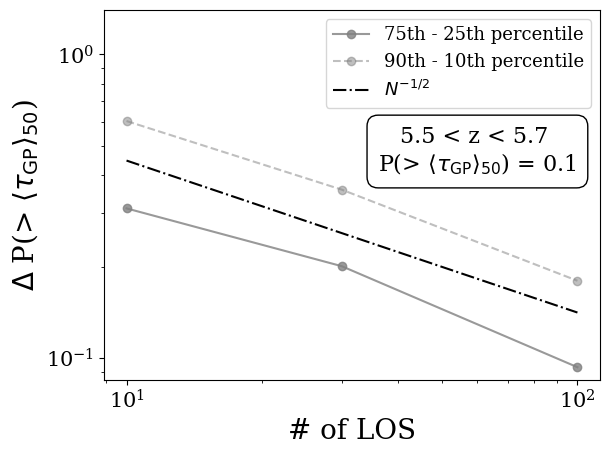

In [8]:
width_los(r'C:\Users\eawer\Downloads\C40-20240625T140952Z-001\C40',["avgflux.x50.res"],five_seven,['A','C','F'],[10,30,100],.1,'5.5 < z < 5.7 \nP(> $\\langle \\tau_{\\mathrm{GP}} \\rangle_{50}$) = 0.1',(60, .48))